In [1]:
import preprocessing as ps
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
random.seed(42)

In [2]:
# Load the data
dataset = pickle.load(open('./networks/network.pkl', 'rb'))

In [3]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = ps.createProjectNetwork(list_1)
full_proj = ps.createProjectNetwork(list_2)
chain_proj = ps.createProjectNetwork(list_3)

In [4]:
# Create a smaller graph of 240 nodes, 60 from each team. 

# Create a list to store the selected samples
selected_samples = []
labels = ['T', 'DM', 'DB', 'AI']

# Iterate over each label
for label in labels:
    # Get all the nodes with the current label
    nodes_with_label = [node for node in dataset.nodes if dataset.nodes[node]['label'] == label]
    
    # Randomly select 60 nodes from the current label
    selected_nodes = random.sample(nodes_with_label, 60)
    
    # Add the selected nodes to the list of selected samples
    selected_samples.extend(selected_nodes)

# Create a new graph with the selected samples
selected_dataset = dataset.subgraph(selected_samples)

In [5]:
selected_dataset.number_of_edges()

823

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have temperature and voltage values for trimmed and untrimmed data

# Load data
data14 = pd.read_csv("/content/gdrive/MyDrive/BGR_2pts/Vref_vdd_0.85.csv")
data15 = pd.read_csv("/content/gdrive/MyDrive/BGR_2pts/Vref_vdd_1.3.csv")
data16 = pd.read_csv("/content/gdrive/MyDrive/BGR_2pts/Vref_vdd_1.8.csv")

# Extract temperature and voltage values
vdd = data14.iloc[:, 0]  # Example temperature range from -50 to 150
v_trimmed_850 = data14.iloc[:, 1]  # TT
v_trimmed_1300 = data15.iloc[:, 1]  # FF
v_trimmed_1800 = data16.iloc[:, 1]  # FS

# Plotting
#plt.figure(figsize=(8, 6))
plt.plot(vdd, v_trimmed_850, 'red', linewidth=3, label='VDD=0.85V')  # TT
plt.plot(vdd, v_trimmed_1300, 'blue', linewidth=3, label='VDD=1.3V')  # FF
plt.plot(vdd, v_trimmed_1800, 'magenta', linewidth=3, label='VDD=1.8V')  # FS


# Set x-axis range and ticks


# Annotate plot with TC values
#plt.title('$V_{REF}$ against Temperature for different Supply Voltages')
plt.xlabel('Temperature (°C)', fontsize=15)
plt.ylabel('$V_{REF}$ (V)', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)

# Increase the font size for the tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

### First experiment

In this experiment, 
1. I am not removing edges that are not in the project network.
2. I am using the sum of adjacent weights as the team influence measure. 

In [6]:
# Creating a copy of the sample network
# network_ = selected_dataset.copy()

In [7]:
# import random
# import networkx as nx

# # Assuming you have a graph named 'graph'

# # Get the list of all possible pairs of nodes that are not connected
# non_edges = list(nx.non_edges(selected_dataset.copy()))

# # Iterate over each pair of nodes and add an edge with a random weight
# for u, v in non_edges:
#     weight = random.uniform(0, 1)  # Generate a random weight between 0 and 1
#     selected_dataset.copy().add_edge(u, v, weight=weight)

In [8]:
# Star project structure
print("Star Project Structure")
network = ps.remove_edges_based_on_project_network(selected_dataset.copy(), star_proj)
subset, comm_eff = ps.RandomGreedy(network, star_proj)
print(f"Total Communication Efficiency : {comm_eff}")

for node in subset:
    print(f"Team :{network.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network, node)}")


Star Project Structure
Seed Node: Hans-Jörg Kreowski
Coordinators Communication Efficiency: 0
Total Communication Efficiency : 143.18
Team :DM, Node: M. Ganesh, Rank: 1
Team :DB, Node: Scott E. Hudson, Rank: 1
Team :T, Node: Hans-Jörg Kreowski, Rank: 58
Team :AI, Node: Jürgen Forster, Rank: 1


In [9]:
# subset, comm_eff = ps.InfluenceGreedy(network, star_proj)
# print(f"Total Communication Efficiency: {comm_eff}")

# for node in subset:
#     print(f"Team :{network.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network, node)}")

In [10]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, star_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

Coordinators communication efficiency 100.0
Total Communication Efficiency : 360.9233
Team :T, Node: Paul Dütting Rank: 10
Team :DB, Node: Flavio Junqueira Rank: 10
Team :DM, Node: Rosie Jones Rank: 26
Team :AI, Node: Jürgen Forster Rank: 1


In [11]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, star_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

Influential First
{'T': 'Stefan Hougardy', 'AI': 'Jürgen Forster', 'DM': 'M. Ganesh', 'DB': 'Scott E. Hudson'}
Coordinators communication efficiency 40.0
Total Communication Efficiency : 233.18
Team :DM, Node: M. Ganesh Rank: 1
Team :T, Node: Stefan Hougardy Rank: 1
Team :DB, Node: Scott E. Hudson Rank: 1
Team :AI, Node: Giancarlo Mauri Rank: 22


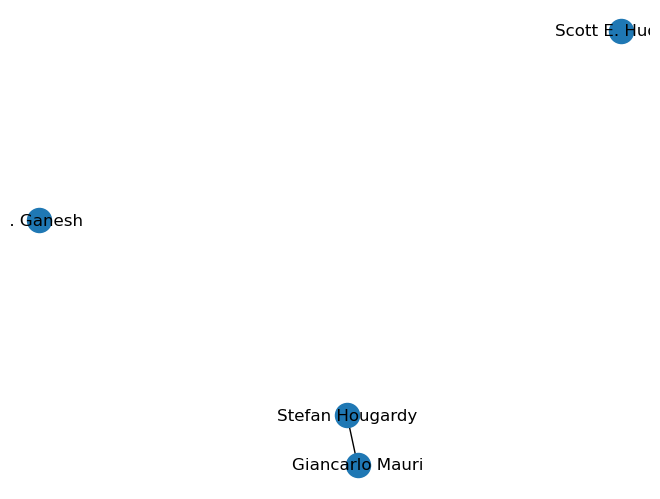

In [12]:
nx.draw(network.subgraph(best_set), with_labels=True)
plt.show()

In [13]:
# # Plot the chain_proj graph
# nx.draw(network.subgraph(subset), with_labels=True)
# plt.show()

In [14]:
print("Fully-Connected Project Structure")
network_2 = ps.remove_edges_based_on_project_network(selected_dataset.copy(), full_proj)
subset, comm_eff = ps.RandomGreedy(network, full_proj)
print(f"Total Communication Efficiency : {comm_eff}")

for node in subset:
    print(f"Team :{network_2.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network_2, node)}")

Fully-Connected Project Structure
Seed Node: Christopher Olston
Coordinators Communication Efficiency: 0
Total Communication Efficiency : 143.18
Team :DM, Node: Christopher Olston, Rank: 55
Team :DB, Node: Scott E. Hudson, Rank: 1
Team :T, Node: Stefan Hougardy, Rank: 1
Team :AI, Node: Jürgen Forster, Rank: 1


In [15]:
# subset, comm_eff = ps.InfluenceGreedy(network_2, full_proj)
# print(f"Total Communication Efficiency : {comm_eff}")

# for node in subset:
#     print(f"Team :{network_2.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network_2, node)}")

In [16]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
for node in network_2.nodes():
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network_2, full_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

# print(f"Best set: {best_set}")
print(f"Total Communication Efficiency : {max_communication_efficiency}")
print("Coordinators communication efficiency", ps.sum_edge_weights(network_2.subgraph(best_set))) 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network_2, node)}")

Total Communication Efficiency : 460.9233
Coordinators communication efficiency 150.0
Team :T, Node: Paul Dütting Rank: 10
Team :DB, Node: Flavio Junqueira Rank: 10
Team :DM, Node: Rosie Jones Rank: 26
Team :AI, Node: Jürgen Forster Rank: 1


In [17]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network_2)
for node in influential_nodes:
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network_2, full_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network_2.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network_2.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network_2, node)}")

Influential First
{'T': 'Stefan Hougardy', 'AI': 'Jürgen Forster', 'DM': 'M. Ganesh', 'DB': 'Scott E. Hudson'}
Coordinators communication efficiency 87.22
Total Communication Efficiency : 301.23
Team :DB, Node: Scott E. Hudson Rank: 1
Team :T, Node: Stefan Hougardy Rank: 1
Team :DM, Node: Gang Li Rank: 39
Team :AI, Node: Giancarlo Mauri Rank: 22


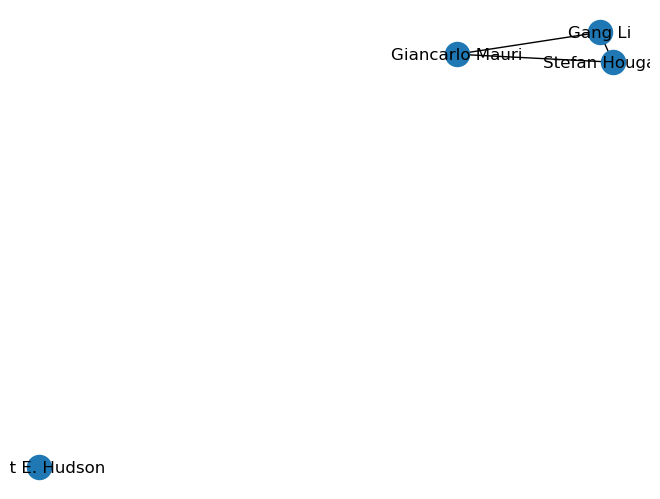

In [18]:
nx.draw(network_2.subgraph(best_set), with_labels=True)
plt.show()

In [19]:
print("Chain Project Structure")
network_3 = ps.remove_edges_based_on_project_network(selected_dataset.copy(), chain_proj)
subset, comm_eff = ps.RandomGreedy(network_3, chain_proj)
print(f"Total Communication Efficiency : {comm_eff}")

for node in subset:
    print(f"Team :{network_3.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network_3, node)}")

Chain Project Structure
Seed Node: Ryszard Kowalczyk
Coordinators Communication Efficiency: 0
Total Communication Efficiency : 143.18
Team :DM, Node: M. Ganesh, Rank: 1
Team :T, Node: Stefan Hougardy, Rank: 1
Team :DB, Node: Scott E. Hudson, Rank: 1
Team :AI, Node: Ryszard Kowalczyk, Rank: 9


In [20]:
# subset, comm_eff = ps.InfluenceGreedy(network_3, chain_proj)
# print(f"Total Communication Efficiency : {comm_eff}")

# for node in subset:
#     print(f"Team :{network_3.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network_3, node)}")

In [21]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
for node in network_3.nodes():
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network_3, chain_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print(f"Total Communication Efficiency : {max_communication_efficiency}")
print("Coordinators communication efficiency", ps.sum_edge_weights(network_3.subgraph(best_set))) 

for node in best_set:
    print(f"Team :{network_3.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network_3, node)}")

Total Communication Efficiency : 360.9233
Coordinators communication efficiency 100.0
Team :T, Node: Paul Dütting Rank: 10
Team :DB, Node: Flavio Junqueira Rank: 10
Team :DM, Node: Rosie Jones Rank: 26
Team :AI, Node: Jürgen Forster Rank: 1


In [22]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network_3)
for node in influential_nodes:
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network_3, chain_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network_3.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network_3.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network_3, node)}")

Influential First
{'T': 'Stefan Hougardy', 'AI': 'Jürgen Forster', 'DM': 'M. Ganesh', 'DB': 'Scott E. Hudson'}
Coordinators communication efficiency 0
Total Communication Efficiency : 150.0
Team :DB, Node: Scott E. Hudson Rank: 1
Team :T, Node: Stefan Hougardy Rank: 1
Team :DM, Node: M. Ganesh Rank: 1
Team :AI, Node: Jürgen Forster Rank: 1


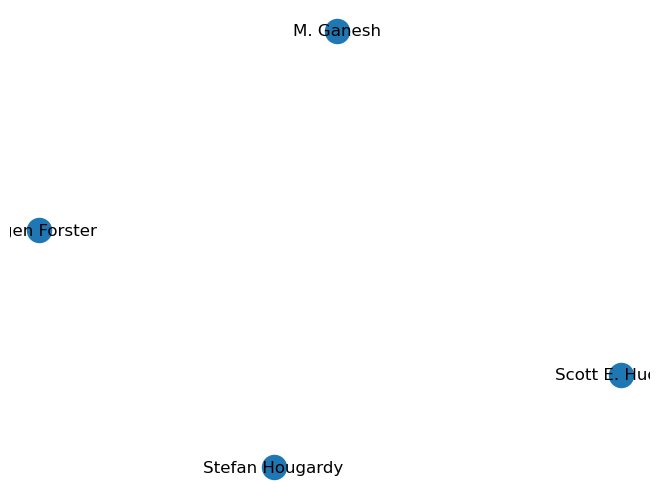

In [23]:
# Plot the chain_proj graph
nx.draw(network_3.subgraph(best_set), with_labels=True)
plt.show()

In [24]:
selected_dataset.number_of_edges()

823

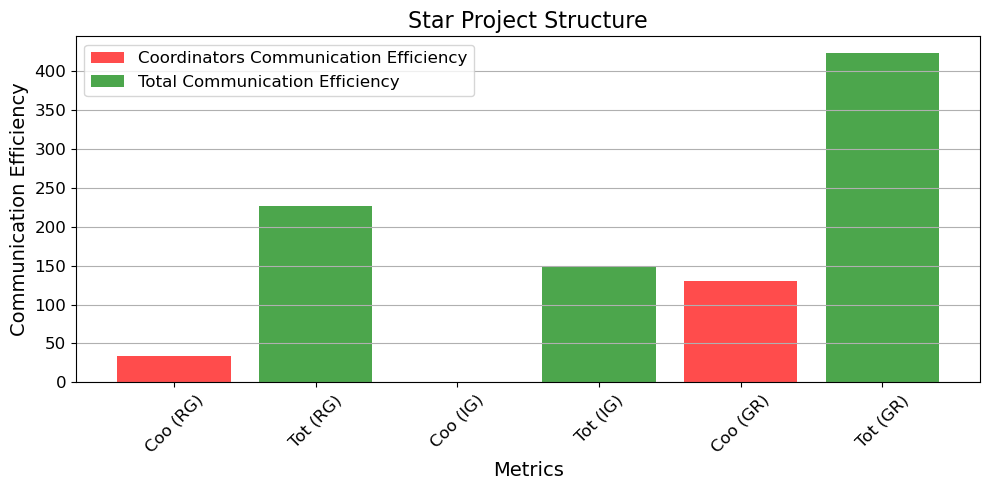

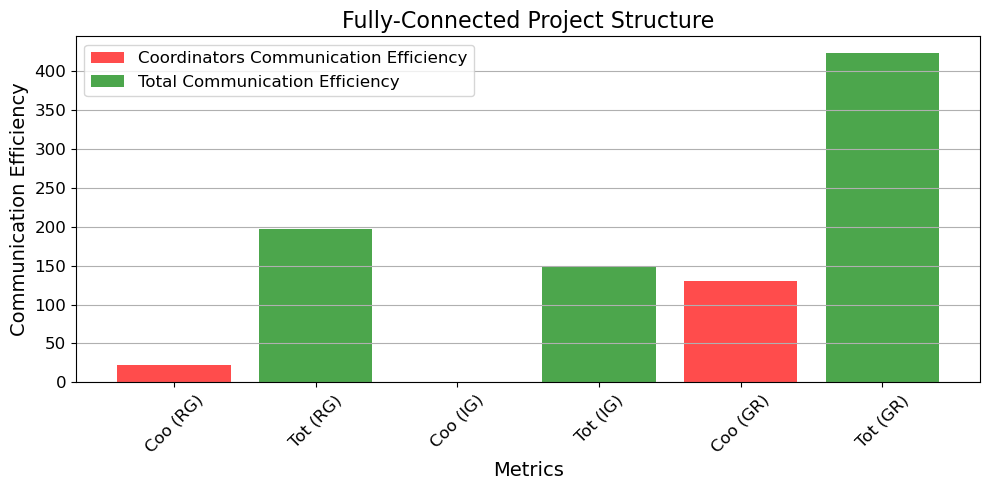

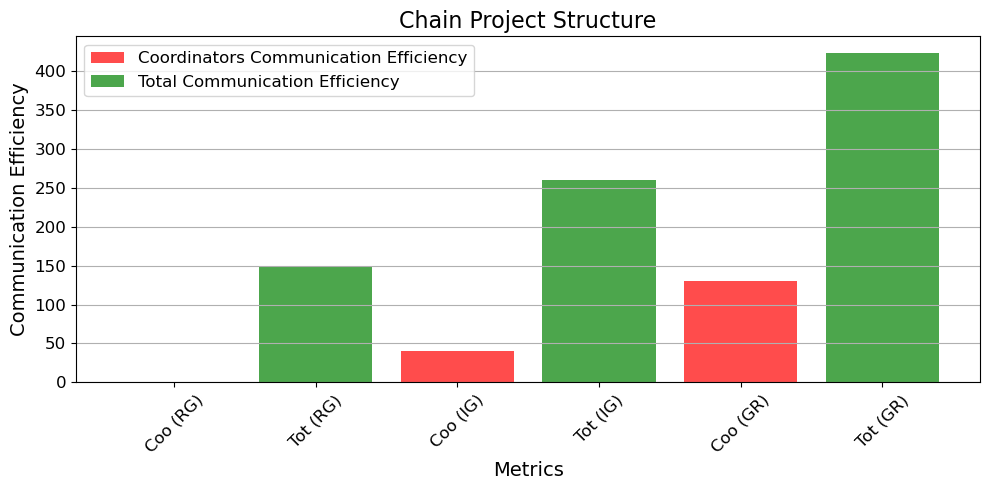

In [25]:
import matplotlib.pyplot as plt

# Data for the plots
data = {
    'Star': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 33.33,
            'Total Communication Efficiency': 225.9043
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    },
    'Fully-Connected': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 22.220000000000002,
            'Total Communication Efficiency': 196.5813
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    },
    'Chain': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 40.0,
            'Total Communication Efficiency': 260.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    }
}

# Define abbreviations for the algorithms
abbreviations = {'Random Greedy': 'RG', 'Influence Greedy': 'IG', 'Greedy': 'GR'}

# Plotting
for project, algorithms in data.items():
    plt.figure(figsize=(10, 5))
    plt.title(f'{project} Project Structure', fontsize=16)
    legends_added = False  # Flag to track if legends have been added
    for algorithm, metrics in algorithms.items():
        x = range(len(metrics))
        colors = ['r', 'g']
        abbrev = abbreviations[algorithm]
        for i, (metric, value) in enumerate(metrics.items()):
            color = colors[i] if 'Coordinators' in metric else 'g'
            plt.bar(f'{metric[:3]} ({abbrev})', value, label=metric, color=color, alpha=0.7)
        # Add legend if it hasn't been added before
        if not legends_added:
            plt.legend(fontsize=12)
            legends_added = True  # Set the flag to True after adding legends
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Communication Efficiency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()